In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

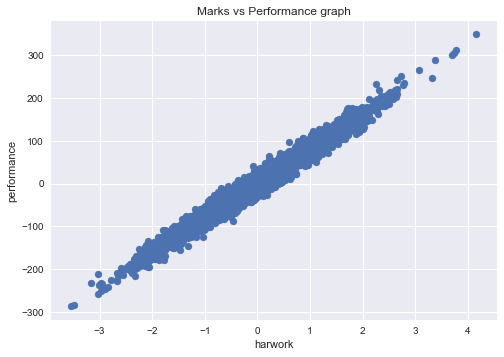

In [4]:
### section 1 ###
### DATA LOAD ###
X=pd.read_csv('.\Training Data\Linear_X_Train.csv')
y=pd.read_csv('.\Training Data\Linear_Y_Train.csv')

### convert to numpy array ###
X=X.values
y=y.values

### Normalize the data ###
u=X.mean()
std=X.std()
X=(X-u)/std

### Visualisation ###
plt.style.use('seaborn')
plt.title('Marks vs Performance graph')
plt.xlabel('harwork')
plt.ylabel('performance')
plt.scatter(X,y)
plt.show()

In [28]:
### Section 2 : Linear Regression ###

def hypothesis(x,theta):
    y_=theta[0]+theta[1]*x
    return y_


def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    
    for i in range(m):
        y_=hypothesis(X[i],theta)
        total_error += (y_-Y[i])**2
        
    return total_error/m  
        


def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    
    for i in range(m):
        y_=hypothesis(X[i],theta)
        x=X[i]
        y=Y[i]
        grad[0] += y_ - y
        grad[1] +=(y_ - y)*X[i]
        
        
    return grad/m


def gradientDescent(X,Y,learning_rate=0.1,max_steps=100):
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]
    for i in range(max_steps):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        
    return theta,error_list,theta_list
        
        


    
    

In [29]:
theta,errorlist,theta_list=gradientDescent(X,y)

In [30]:
print(theta)

[ 0.6838508  79.90361453]


In [31]:
print(errorlist)

[array([6576.35005246]), array([5363.12510257]), array([4380.41289317]), array([3584.41600355]), array([2939.65852295]), array([2417.40496367]), array([1994.37958066]), array([1651.72902041]), array([1374.18206661]), array([1149.36903404]), array([967.27047765]), array([819.77064698]), array([700.29578413]), array([603.52114523]), array([525.13368772]), array([461.63984713]), array([410.20983626]), array([368.55152745]), array([334.80829731]), array([307.47628091]), array([285.33734761]), array([267.40481165]), array([252.87945752]), array([241.11392067]), array([231.58383582]), array([223.8644671]), array([217.61177843]), array([212.54710061]), array([208.44471157]), array([205.12177646]), array([202.43019901]), array([200.25002128]), array([198.48407732]), array([197.05366271]), array([195.89502687]), array([194.95653185]), array([194.19635088]), array([193.58060429]), array([193.08184956]), array([192.67785822]), array([192.35062524]), array([192.08556653]), array([191.87086897]), a

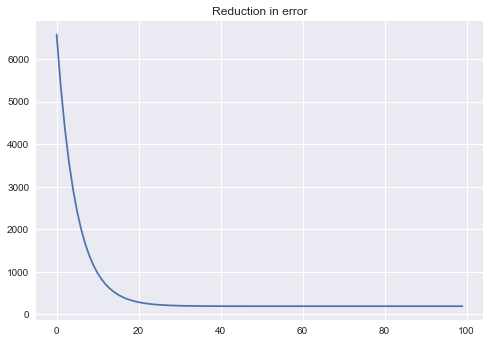

In [32]:
### section 3 :visualisation ###
plt.plot(errorlist)
plt.title("Reduction in error")
plt.show()

In [33]:
Y=theta[0]+theta[1]*X

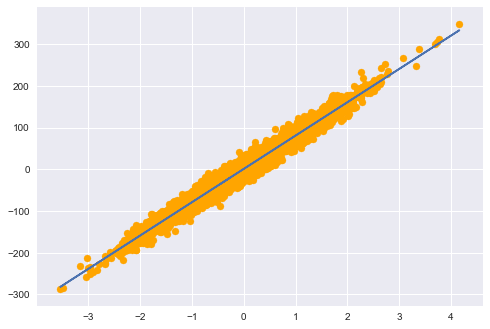

In [34]:
plt.plot(X,Y)
plt.scatter(X,y,color='orange')
plt.show()


In [35]:
X_test=pd.read_csv('./Test Cases/Linear_X_Test.csv').values
y_test=hypothesis(X_test,theta)


In [36]:
df=pd.DataFrame(data=y_test,columns=["y"])
df.to_csv('submission.csv',index=False)

In [37]:
### section 4 : r2 score or coefficient of Determination ###
y_=hypothesis(X,theta)
def r2s(y,y_):
    
    num= np.sum((y-y_)**2)
    den= np.sum((y-y.mean())**2)
    
    score=1-num/den
    
    return score*100


In [38]:
score=r2s(y,y_)

In [39]:
print(score)

97.09612226971643


# data visualisation : loss funtion ,gradient descent and theta update

In [40]:
from mpl_toolkits import mplot3d

In [41]:
theta

array([ 0.6838508 , 79.90361453])

In [48]:
# loss actually

T0=np.arange(-40,40,1)
T1=np.arange(40,120,1)

T0,T1=np.meshgrid(T0,T1)

J=np.zeros(T0.shape)

for i in range(T0.shape[0]):
    for j in range(T1.shape[0]):
        y_=T0[i,j]+T1[i,j]*X
        J[i,j]=np.sum((y-y_)**2)/y.shape[0]

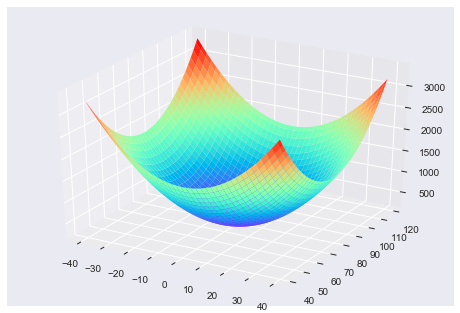

In [49]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

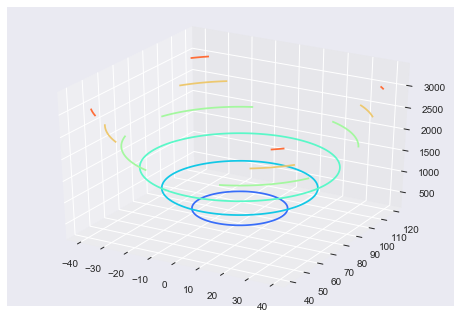

In [50]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

# visualizaton of theta update


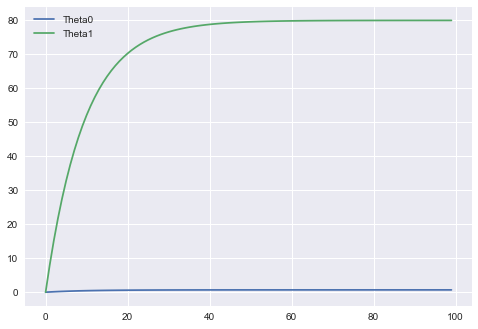

In [51]:
theta_list=np.array(theta_list)
plt.plot(theta_list[:,0],label='Theta0')
plt.plot(theta_list[:,1],label='Theta1')
plt.legend()
plt.show()

# trajectory of theta function in loss function graph

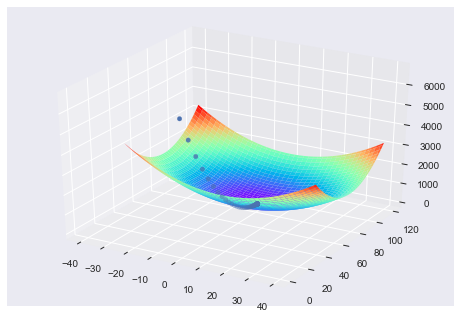

In [52]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],errorlist)
plt.show()

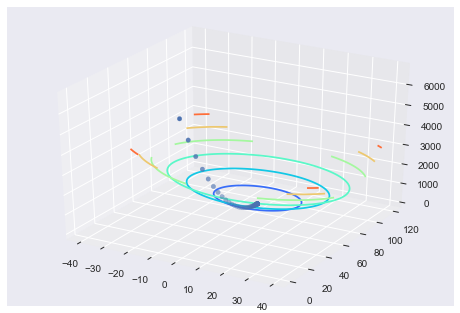

In [53]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],errorlist)
plt.show()

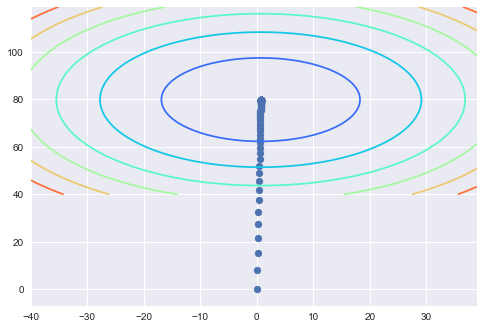

In [55]:
# 2d contour

plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()

In [57]:
np.save("Thetalist.npy",theta_list)